In [2]:
#Import packages
import pandas as pd
import h5py
import numpy as np
import scipy as sp
import scipy.signal as sg
import xarray as xr
import os
import matplotlib.pyplot as plt
from matplotlib import patches
import ast
import glob

from DR_analysis_utils import Session, makePSTH, make_neuron_time_trials_tensor

%matplotlib notebook

In [3]:
#Set paths to experiment folders
main_path = [
    # DR mice
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220815\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220816\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220817\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230123\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230124\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230125\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230126\processed", 
#     r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230130\processed",
#     r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230131\processed", 
#     r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230201\processed", 
#     r"\\allen\programs\mindscope\workgroups\np-exp\PilotEphys\Task 2 pilot\DRpilot_644864_20230202\processed",
#     r"\\allen\programs\mindscope\workgroups\np-exp\PilotEphys\Task 2 pilot\DRpilot_644866_20230207\processed", 
#     r"Y:\DRpilot_644866_20230208\processed",
#     r"Y:\DRpilot_644866_20230209\processed",
#     r"Y:\DRpilot_644866_20230210\processed",
    r"Y:\DRpilot_644867_20230220\processed",
    r"Y:\DRpilot_644867_20230221\processed",
    r"Y:\DRpilot_644867_20230222\processed",
    r"Y:\DRpilot_644867_20230223\processed",
    r"Y:\DRpilot_649943_20230213\processed", 
    r"Y:\DRpilot_649943_20230214\processed",
    r"Y:\DRpilot_649943_20230215\processed",
    r"Y:\DRpilot_649943_20230216\processed",
]


In [4]:
# loop through sessions
unit_summary={}

for ss in main_path:
    session=Session(path=ss) 
    session.assign_unit_areas()
    
    unit_summary[session.metadata['mouseID']+'_'+str(session.metadata['ephys_session_num'])]=session.good_units['area'].value_counts().T

pd.DataFrame(unit_summary).T

probeA areas found
probeB areas found
probeC areas found
probeF areas found
probeA areas found
probeB areas found
probeC areas found
probeF areas found
probeA areas found
probeB areas found
probeC areas found
probeF areas found
probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeF areas found
probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeF areas found
probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found
probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found
probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found
probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found
probeA areas found
probeB areas

,,ACAd6a,ACAv6a,ACAv6b,ACB,AId5,AId6a,AIv2/3,AIv5,APN,...,VISpor4,VISpor5,VISpor6a,VISrl2/3,VISrl4,VISrl5,VL,VPL,VPM,ZI
626791_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0
626791_2,NaN,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
626791_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636766_1,NaN,NaN,NaN,NaN,54.0,17.0,20.0,2.0,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
636766_2,NaN,NaN,NaN,NaN,32.0,10.0,25.0,3.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636766_3,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636766_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644867_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644867_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,3.0,7.0,NaN,NaN,NaN,NaN
644867_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,56.0,14.0,NaN,NaN,NaN,NaN,NaN,18.0,NaN


In [5]:
unit_summary_df = pd.DataFrame(unit_summary).T
unit_summary_df

,,ACAd6a,ACAv6a,ACAv6b,ACB,AId5,AId6a,AIv2/3,AIv5,APN,...,VISpor4,VISpor5,VISpor6a,VISrl2/3,VISrl4,VISrl5,VL,VPL,VPM,ZI
626791_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0
626791_2,NaN,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
626791_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636766_1,NaN,NaN,NaN,NaN,54.0,17.0,20.0,2.0,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
636766_2,NaN,NaN,NaN,NaN,32.0,10.0,25.0,3.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636766_3,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636766_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644867_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644867_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,3.0,7.0,NaN,NaN,NaN,NaN
644867_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,56.0,14.0,NaN,NaN,NaN,NaN,NaN,18.0,NaN


In [6]:
unit_summary_df.columns

Index(['', 'ACAd6a', 'ACAv6a', 'ACAv6b', 'ACB', 'AId5', 'AId6a', 'AIv2/3',
       'AIv5', 'APN',
       ...
       'VISpor4', 'VISpor5', 'VISpor6a', 'VISrl2/3', 'VISrl4', 'VISrl5', 'VL',
       'VPL', 'VPM', 'ZI'],
      dtype='object', length=168)

In [65]:
unit_summary

{'626791_1': CP          83
 LGd-co      52
 CA1         47
 PO          45
 LP          32
 VISpm5      32
 VPM         30
 LD          28
 AUDpo5      27
 AUDp6a      25
 LGd-sh      23
 TEa5        20
 BST         18
 TEa4        17
 MOs6a       16
 MOs2/3      15
 PS          14
 DG-sg       13
 VISpm6a     12
 MOs5        11
 ZI          10
 AUDp6b       8
 DG-po        8
 AUDpo6a      8
 CA3          7
 LPO          7
 DG-mo        6
 LGv          5
 STR          5
 IGL          5
 VISpm4       4
 RSPd6a       4
 N/A          4
 RSPd5        4
 TH           2
 VISli2/3     2
 TEa2/3       2
 IntG         1
 VISpm6b      1
 Name: area, dtype: int64,
 '626791_2': RSPagl5      25
 RSPv5        23
 DG-po        22
 VISp5        22
 CA3          21
 VISp4        20
 NB           17
 RSPagl6a     16
 N/A          16
 PAG          15
 CA1          13
 ProS         10
 SCiw         10
 RSPv6a        9
 ICe           8
 PPT           7
 MOs5          7
 VISp2/3       6
 MRN           6
 S

In [67]:
#simplify areas (take only capital letters)
simple_columns = []
for aa in unit_summary_df.columns:
    main_area = ''
    for char in aa:
        if char.isupper()|char.islower():
            main_area+=char
        else:
            break
    if main_area not in simple_columns:
        simple_columns.append(main_area)
simple_columns

['',
 'ACAd',
 'ACAv',
 'ACB',
 'AId',
 'AIv',
 'APN',
 'AUDp',
 'AUDpo',
 'BST',
 'CA',
 'CL',
 'CP',
 'CUN',
 'DG',
 'DT',
 'FRP',
 'HPF',
 'ICc',
 'ICd',
 'ICe',
 'IGL',
 'ILA',
 'IntG',
 'LD',
 'LGd',
 'LGv',
 'LP',
 'LPO',
 'LSc',
 'LSr',
 'LSv',
 'MB',
 'MD',
 'MEPO',
 'MGd',
 'MGm',
 'MGv',
 'MOp',
 'MOs',
 'MRN',
 'N',
 'NB',
 'NOT',
 'ORBm',
 'PAG',
 'PAL',
 'PIL',
 'PIR',
 'PL',
 'PO',
 'POL',
 'POST',
 'PP',
 'PPN',
 'PPT',
 'PRE',
 'PS',
 'PoT',
 'ProS',
 'RN',
 'RSPagl',
 'RSPd',
 'RSPv',
 'RT',
 'SAG',
 'SCdg',
 'SCdw',
 'SCig',
 'SCiw',
 'SCop',
 'SCsg',
 'SF',
 'SGN',
 'SNr',
 'SSp',
 'STR',
 'SUB',
 'TEa',
 'TH',
 'VISa',
 'VISal',
 'VISam',
 'VISl',
 'VISli',
 'VISp',
 'VISpm',
 'VISpor',
 'VISrl',
 'VL',
 'VPL',
 'VPM',
 'ZI']

In [35]:
# find counts in simplified areas
unit_counts = []
session_counts = []


for aa in simple_columns:
    if len(aa)>0:
        unit_counts.append(np.nansum(unit_summary_df.filter(regex=aa).values))
        session_counts.append(np.sum(np.nansum(unit_summary_df.filter(regex=aa).values,1)>0))
    else:
        unit_counts.append(0)
        session_counts.append(0)
    
unit_summary_simple = {}
unit_summary_simple['area'] = simple_columns
unit_summary_simple['unit_counts'] = unit_counts
unit_summary_simple['session_counts'] = session_counts

unit_summary_simple_df = pd.DataFrame.from_dict(unit_summary_simple)
unit_summary_simple_df

,area,unit_counts,session_counts
0,,0.0,0
1,ACA,9.0,2
2,ACB,86.0,2
3,AI,96.0,2
4,APN,7.0,2
...,...,...,...
61,VIS,1389.0,15
62,VL,6.0,1
63,VPL,70.0,2
64,VPM,114.0,4


<IPython.core.display.Javascript object>


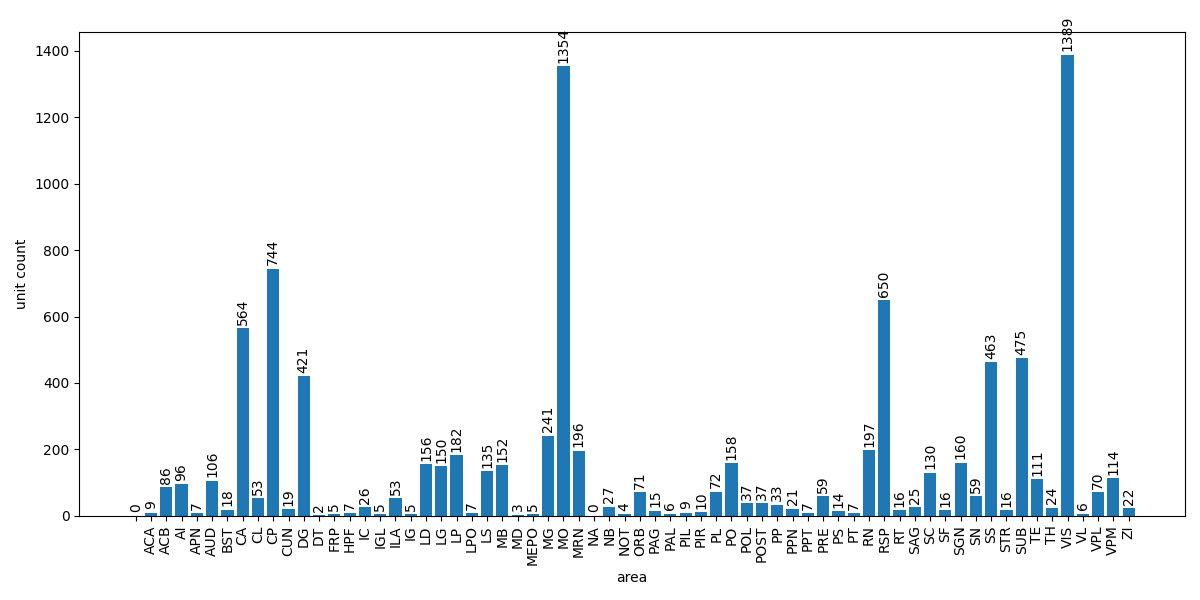

In [62]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.bar(unit_summary_simple_df.index,unit_summary_simple['unit_counts'])
for xx in unit_summary_simple_df.index:
    ax.text(unit_summary_simple_df.index[xx],unit_summary_simple['unit_counts'][xx]+10,
            int(unit_summary_simple['unit_counts'][xx]),ha='center',va='bottom',rotation=90)
ax.set_xticks(unit_summary_simple_df.index)
ax.set_xticklabels(unit_summary_simple_df['area'],rotation=90)
ax.set_ylabel('unit count')
ax.set_xlabel('area')
fig.tight_layout()

<IPython.core.display.Javascript object>


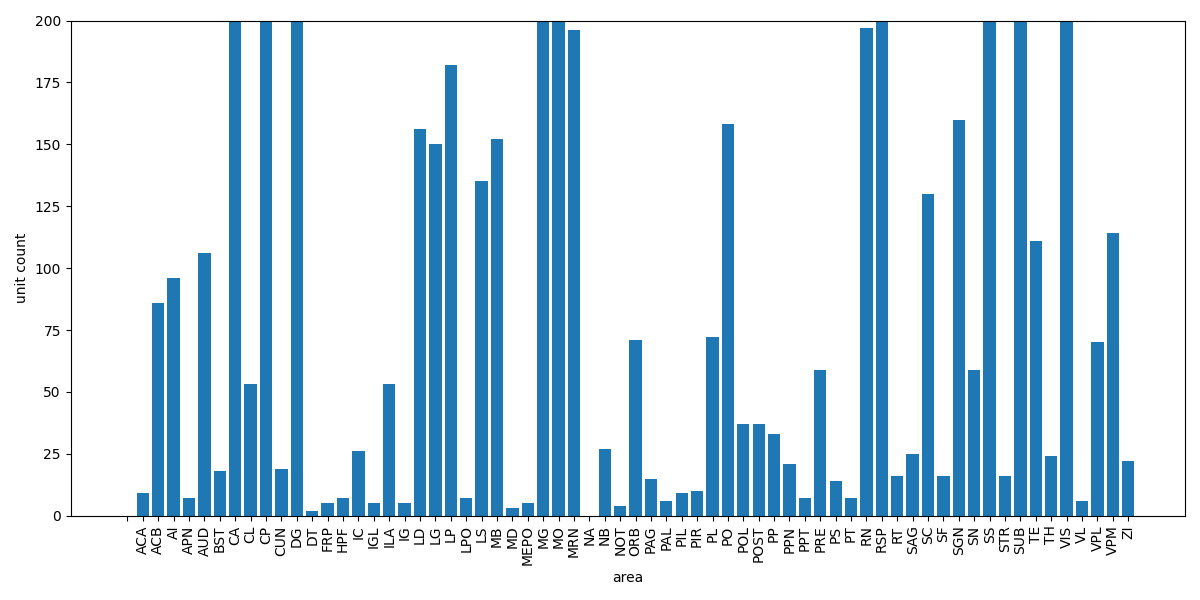

In [46]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.bar(unit_summary_simple_df.index,unit_summary_simple['unit_counts'])
ax.set_xticks(unit_summary_simple_df.index)
ax.set_xticklabels(unit_summary_simple_df['area'],rotation=90)
ax.set_ylabel('unit count')
ax.set_xlabel('area')
ax.set_ylim([0,200])
fig.tight_layout()

<IPython.core.display.Javascript object>


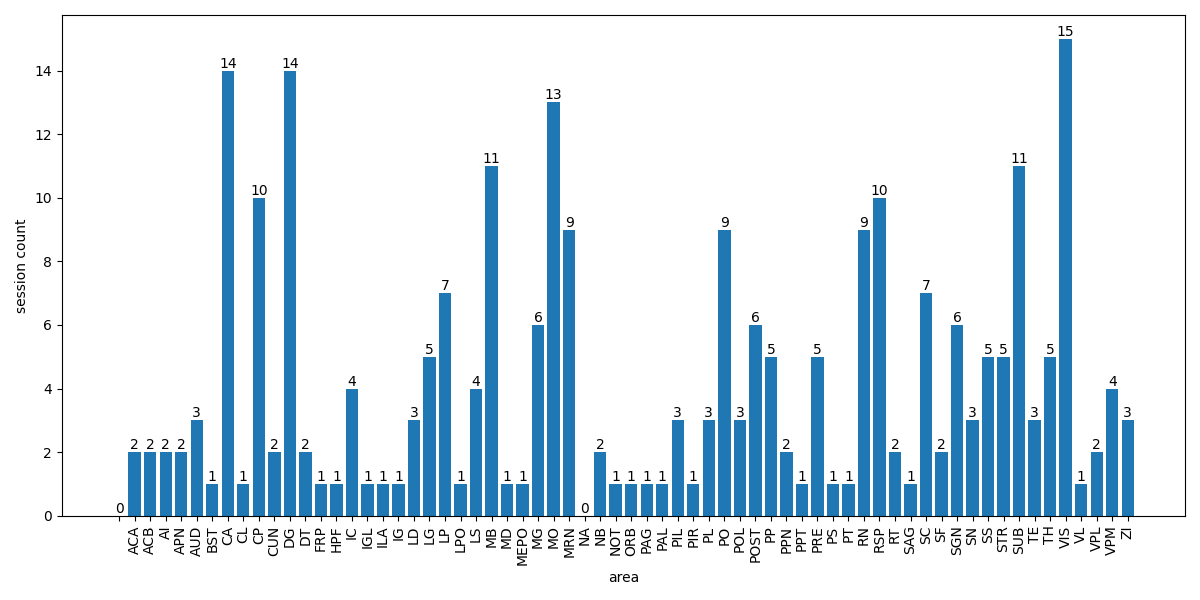

In [64]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.bar(unit_summary_simple_df.index,unit_summary_simple['session_counts'])
for xx in unit_summary_simple_df.index:
    ax.text(unit_summary_simple_df.index[xx],unit_summary_simple['session_counts'][xx],
            int(unit_summary_simple['session_counts'][xx]),ha='center',va='bottom')
ax.set_xticks(unit_summary_simple_df.index)
ax.set_xticklabels(unit_summary_simple_df['area'],rotation=90)
ax.set_ylabel('session count')
ax.set_xlabel('area')
fig.tight_layout()

In [ ]:
# plot num VIS and AUD units in separate columns

from numpy.random import default_rng
rng = default_rng()

jitter_x=rng.standard_normal(len(trial_summary_df))/30

fig,ax=plt.subplots(1,1)

ax.plot(np.zeros(len(unit_summary_df))+jitter_x,unit_summary_df['VIS_n'],'.')
ax.plot(np.ones(len(unit_summary_df))+jitter_x,unit_summary_df['AUD_n'],'.')

ax.set_xlim([-0.5,1.5])
ax.set_xticks([0,1])
ax.set_xticklabels(['VIS','AUD'])

In [ ]:
trial_summary_df

In [ ]:
# plot total num trials across sessions (diff color/fill for AUD vs. VIS mice)
from numpy.random import default_rng
rng = default_rng()

jitter_x=rng.standard_normal(len(trial_summary_df))/50

fig,ax=plt.subplots(1,1)
ax.plot(jitter_x,trial_summary_df['n_trials'],'.')
ax.set_xlim([-.5,.5])

In [ ]:
# plot both in a single plot

fig,ax=plt.subplots(1,2)

jitter_x=rng.standard_normal(len(trial_summary_df))/15

face_color='k'
for ss in range(0,len(unit_summary_df)):
    ax[0].plot(jitter_x[ss],unit_summary_df['VIS_n'][ss],'ko',markerfacecolor=face_color,alpha=0.5)
    ax[0].plot(1+jitter_x[ss],unit_summary_df['AUD_n'][ss],'ko',markerfacecolor=face_color,alpha=0.5)
ax[0].plot(0,np.nanmean(unit_summary_df['VIS_n']),'k_',markersize=30)
ax[0].plot(1,np.nanmean(unit_summary_df['AUD_n']),'k_',markersize=30)
    
ax[0].set_xlim([-0.5,1.5])
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(['VIS','AUD'])

ax[0].set_xlabel('brain area')
ax[0].set_ylabel('n neurons recorded')

n_vis=np.round(np.nanmean(unit_summary_df['VIS_n']),decimals=1)
n_aud=np.round(np.nanmean(unit_summary_df['AUD_n']),decimals=1)
ax[0].set_title('mean n neurons: VIS:'+str(n_vis)+' AUD:'+str(n_aud))


for ss in range(0,len(unit_summary_df)):
    if modality[ss]=='vis':
        face_color='k'
    elif modality[ss]=='aud':
        face_color='white'
    ax[1].plot(jitter_x[ss],trial_summary_df['n_trials'][ss],'ko',markerfacecolor=face_color,alpha=0.5)

ax[1].plot(0,np.nanmean(trial_summary_df['n_trials']),'k_',markersize=30)
ax[1].set_xlim([-1,1])
ax[1].set_xticks([0])
ax[1].set_xticklabels([''])
ax[1].set_ylabel('n trials')
ax[1].set_ylim([0,750])

ntrials=np.round(np.nanmean(trial_summary_df['n_trials']),decimals=1)
ax[1].set_title('mean n trials: '+str(ntrials))

fig.tight_layout()